# Central Limit Theorem

The central limit theorem is a fundamental tool in statistics. It says, with some assumptions, that sampling distributions are normal with a specific mean and variance. It's a vital tool in data science when working with large data sets. Often a random sample (or many random samples) can tell us crucial information about a much larger dataset.

For example, if you work at a large social media company and you want to estimate the distribution of the ages of your users for targetting ads, you could extract the ages of hundreds of millions of users from your database and compute the distribution. This will take a lot of time and effort, and it's usually enough to simply look at a much smaller but random subset of users.

## Sampling Distributions

Usually we do not know the true distribution of our data so we study it by looking at the distribution of random samples. It turns out that we can often identify the underlying "true" distribution within any necessary degree of approximation as long as we can obtain enough data.

In [7]:
# tell matplotlib to drawinside notebook not new window
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns # for nice looking plots

Let's start by looking at a typical statistical distribution: [the exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution). Here's what it looks like (it goes to $\infty$ so we just look at the front).

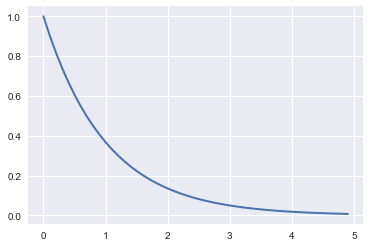

In [8]:
x = np.arange(0, 5, 0.1)
dist = stats.expon(0)
plt.plot(x, dist.pdf(x), lw=2)

This distribution has one parameter $\lambda$ and the mean and standard deviation are both the same and equal to $\lambda$.

In [9]:
print "Mean:", dist.mean()
print "Std Dev:", dist.std()

Mean: 1.0
Std Dev: 1.0


# Sampling
Let's take a look at a random sample from the exponential distribution. Rerun the following cell several times.

Sample Mean: 0.967706644135
Sample Std Dev: 0.952236722664


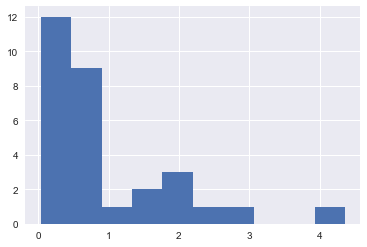

In [10]:
# Take a random sample of size 30
sample = dist.rvs(30)
print "Sample Mean:", np.mean(sample)
print "Sample Std Dev:", np.std(sample)
plt.hist(sample, bins=10)
plt.show()

A histogram of our random sample looks approximately like our distribution and the sample has a mean and standard deviation in the ballpark of our true parameter values. Let's take a look at the distribution of the means of many such random samples.

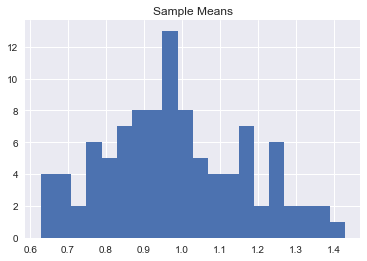

Mean of Means: 0.981885394347
SD of Means: 0.185049859408


In [11]:
means = []
devs = []
samples = 100
for i in range(samples):
    sample = dist.rvs(30)
    means.append(np.mean(sample))
    devs.append(np.std(sample))
plt.hist(means, bins=20)
plt.title("Sample Means")
plt.show()

print "Mean of Means:", np.mean(means)
print "SD of Means:", np.std(means)

The mean of the means is much closer to our actual mean (1). Let's take many samples and see if things get better.

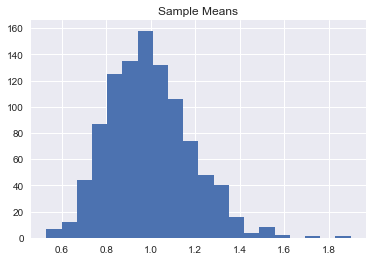

Mean of Means: 0.992508535707
SD of Means: 0.184062165054
Dist Mean: 1.0
Dist std / sqrt(30): 0.182574185835


In [16]:
means = []
devs = []
samples = 1000
for i in range(samples):
    sample = dist.rvs(30)
    means.append(np.mean(sample))
    devs.append(np.std(sample))
plt.hist(means, bins=20)
plt.title("Sample Means")
plt.show()

print "Mean of Means:", np.mean(means)
print "SD of Means:", np.std(means)

print "Dist Mean:", dist.mean()
print "Dist std / sqrt(30):", dist.std() / np.sqrt(30)

That's really close! The distribution looks like a normal distribution too. Let's do a quick curve fit (called a kernel density estimate). First we'll look at a large sample, and then at the distribution of means of many samples.

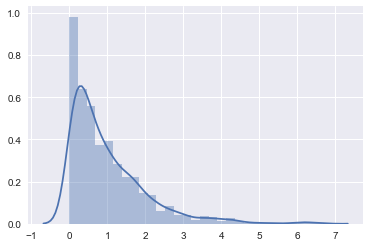

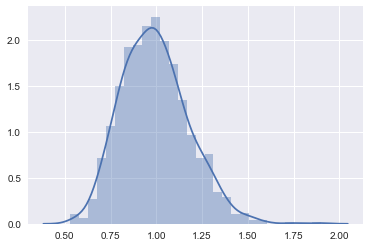

In [17]:
import seaborn as sns
sns.distplot(dist.rvs(1000))
sns.plt.show()
sns.distplot(means)
sns.plt.show()

## The Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) explains what we've just observed. It says that, as the size $n$ of a sample increases, that:
* the mean of the sample $\bar{x}$ converges to the mean of the true distribution, and
* the standard deviation $s$ of the sample is the same as the true standard deviation $\sigma$

The sampling distribution of the means has:
* The same mean as the original distribution
* A standard deviation $\hat{\sigma}$ given by the true standard deviation divided by $\sqrt{n}$:
$$\sigma' = \frac{\sigma}{\sqrt{n}}$$

This quantity is usually referred to as the *standard error*.

In practice, we typically use these results as follows. Take a large random sample and calculate the sample mean $\bar{x}$ and the sample deviation $s$. Then the true mean lies, with 95% confidence, in the interval:
$$(\bar{x} - 2s, \bar{x} + 2s)$$

As the sample size $n$ gets large, the error $s$ gets small. So for a large enough sample we can get a very good approximation of the true mean.

## Other distributions

Let's try this out with some other distributions. First we select a random distribution.

In [18]:
import random
distributions = [stats.lognorm(0.5, 1), stats.chi(1, 0.5), stats.gamma(1, 1)]
dist = random.choice(distributions)

Now let's look at a random sample.

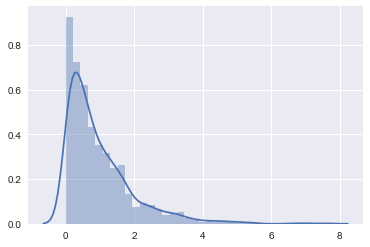

True mean: 1.0
Sample mean: 0.986504948672
Confidence interval: (0.923129911059, 1.04987998629)


In [22]:
n = 1000
sample = dist.rvs(n)
sns.distplot(sample)
sns.plt.show()

mean = np.mean(sample)
dev = np.std(sample) / np.sqrt(n)

print "True mean:", dist.mean()
print "Sample mean:", mean
print "Confidence interval:", "({}, {})".format(mean - 2*dev, mean + 2*dev)